## Conversion to fif: BJH016

This script takes the raw, original data file we recieved from WashU and converts it to a fif file with the photodiode as a new stim channel

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal, stats
import mat73
import re
from neurodsp.timefrequency import compute_wavelet_transform
from BCI2kReader import BCI2kReader as b2k
import os
import mne
from tabulate import tabulate
import IPython
import seaborn as sns

In [11]:
## prep paths

subject = 'BJH016'
orig_data_fi = '/home/brooke/knight_server/remote/WashU/data/PacmanTask/BJH016/PacmanTask/ECOGS001R01.dat'
raw_data_dir = f"/home/brooke/pacman/raw_data/{subject}"

In [4]:
## load data

with b2k.BCI2kReader(orig_data_fi) as data: #opens a stream to the dat file
    my_signals = data.signals
    my_states = data.states
    my_params = data.parameters

In [ ]:
## check structure if necessary

# my_states
# my_params

In [5]:
## create info field 

info = mne.create_info(ch_names = my_params['ChannelNames'],
                       sfreq = my_params['SamplingRate'],
                       ch_types = 'seeg')

info

<Info | 7 non-empty values
 bads: []
 ch_names: EMPTY, EMPTY_2, EMPTY_3, EMPTY_4, REF1, REF2, AL1, AL2, AL3, ...
 chs: 272 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: unspecified
 nchan: 272
 projs: []
 sfreq: 2000.0 Hz
>

In [6]:
## create mne object
mne_df = mne.io.RawArray(my_signals, info)

Creating RawArray with float64 data, n_channels=272, n_times=5901900
    Range : 0 ... 5901899 =      0.000 ...  2950.950 secs
Ready.


In [7]:
mne_df.info

<Info | 7 non-empty values
 bads: []
 ch_names: EMPTY, EMPTY_2, EMPTY_3, EMPTY_4, REF1, REF2, AL1, AL2, AL3, ...
 chs: 272 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: unspecified
 nchan: 272
 projs: []
 sfreq: 2000.0 Hz
>

In [8]:
## create stim channel and add it to mne object

info = mne.create_info(['STI'], my_params['SamplingRate'], ['stim'])
stim_raw = mne.io.RawArray( my_states['Trial_on_off'], info)
mne_df.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=5901900
    Range : 0 ... 5901899 =      0.000 ...  2950.950 secs
Ready.


<RawArray | 273 x 5901900 (2950.9 s), ~12.00 GB, data loaded>

In [9]:
stim_raw

<RawArray | 1 x 5901900 (2950.9 s), ~45.0 MB, data loaded>

In [20]:
## save it

mne_df.save(f"{raw_data_dir}/ieeg/{subject}_raw_ieeg.fif",  overwrite = True)

Overwriting existing file.
Writing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg.fif
Overwriting existing file.
Writing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-1.fif
Overwriting existing file.
Writing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-2.fif
Overwriting existing file.
Writing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-3.fif
Closing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-3.fif
Closing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-2.fif
Closing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg-1.fif
Closing /home/brooke/pacman/raw_data/BJH016/ieeg/BJH016_raw_ieeg.fif
[done]


Effective window size : 1.024 (s)


/tmp/ipykernel_24755/132848401.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne_df.plot_psd()


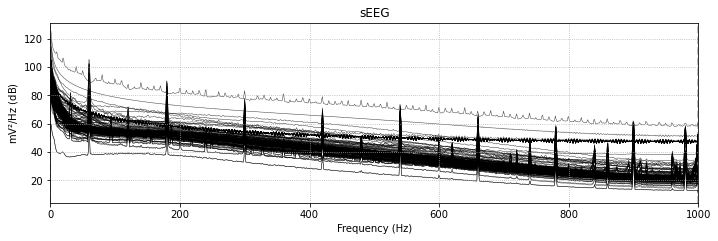

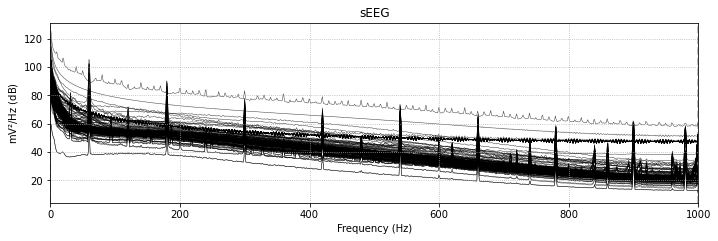

In [16]:
mne_df.plot_psd()